Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Acknowledgements:

In [137]:
import numpy as np
import pandas as pd
data = pd.read_csv('winequalityN.csv')  

In [138]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [140]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

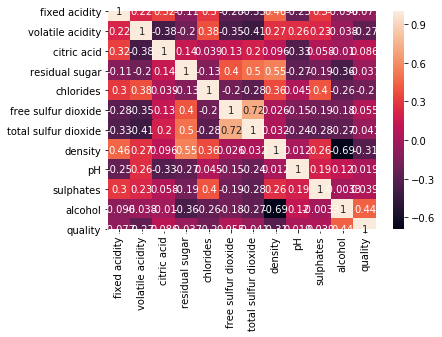

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

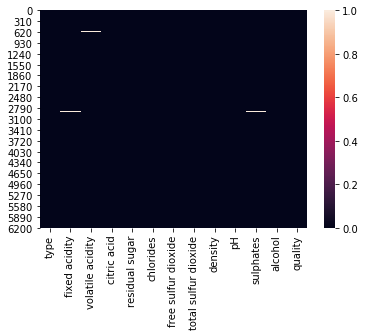

In [142]:
sns.heatmap(data.isnull())

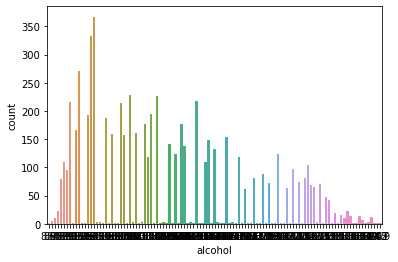

In [143]:
sns.countplot(data.alcohol)

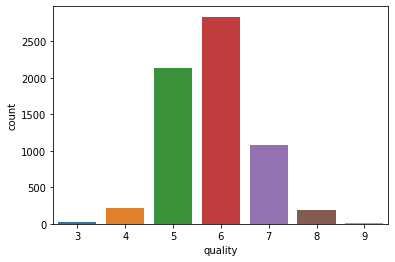

In [8]:
sns.countplot(data.quality)

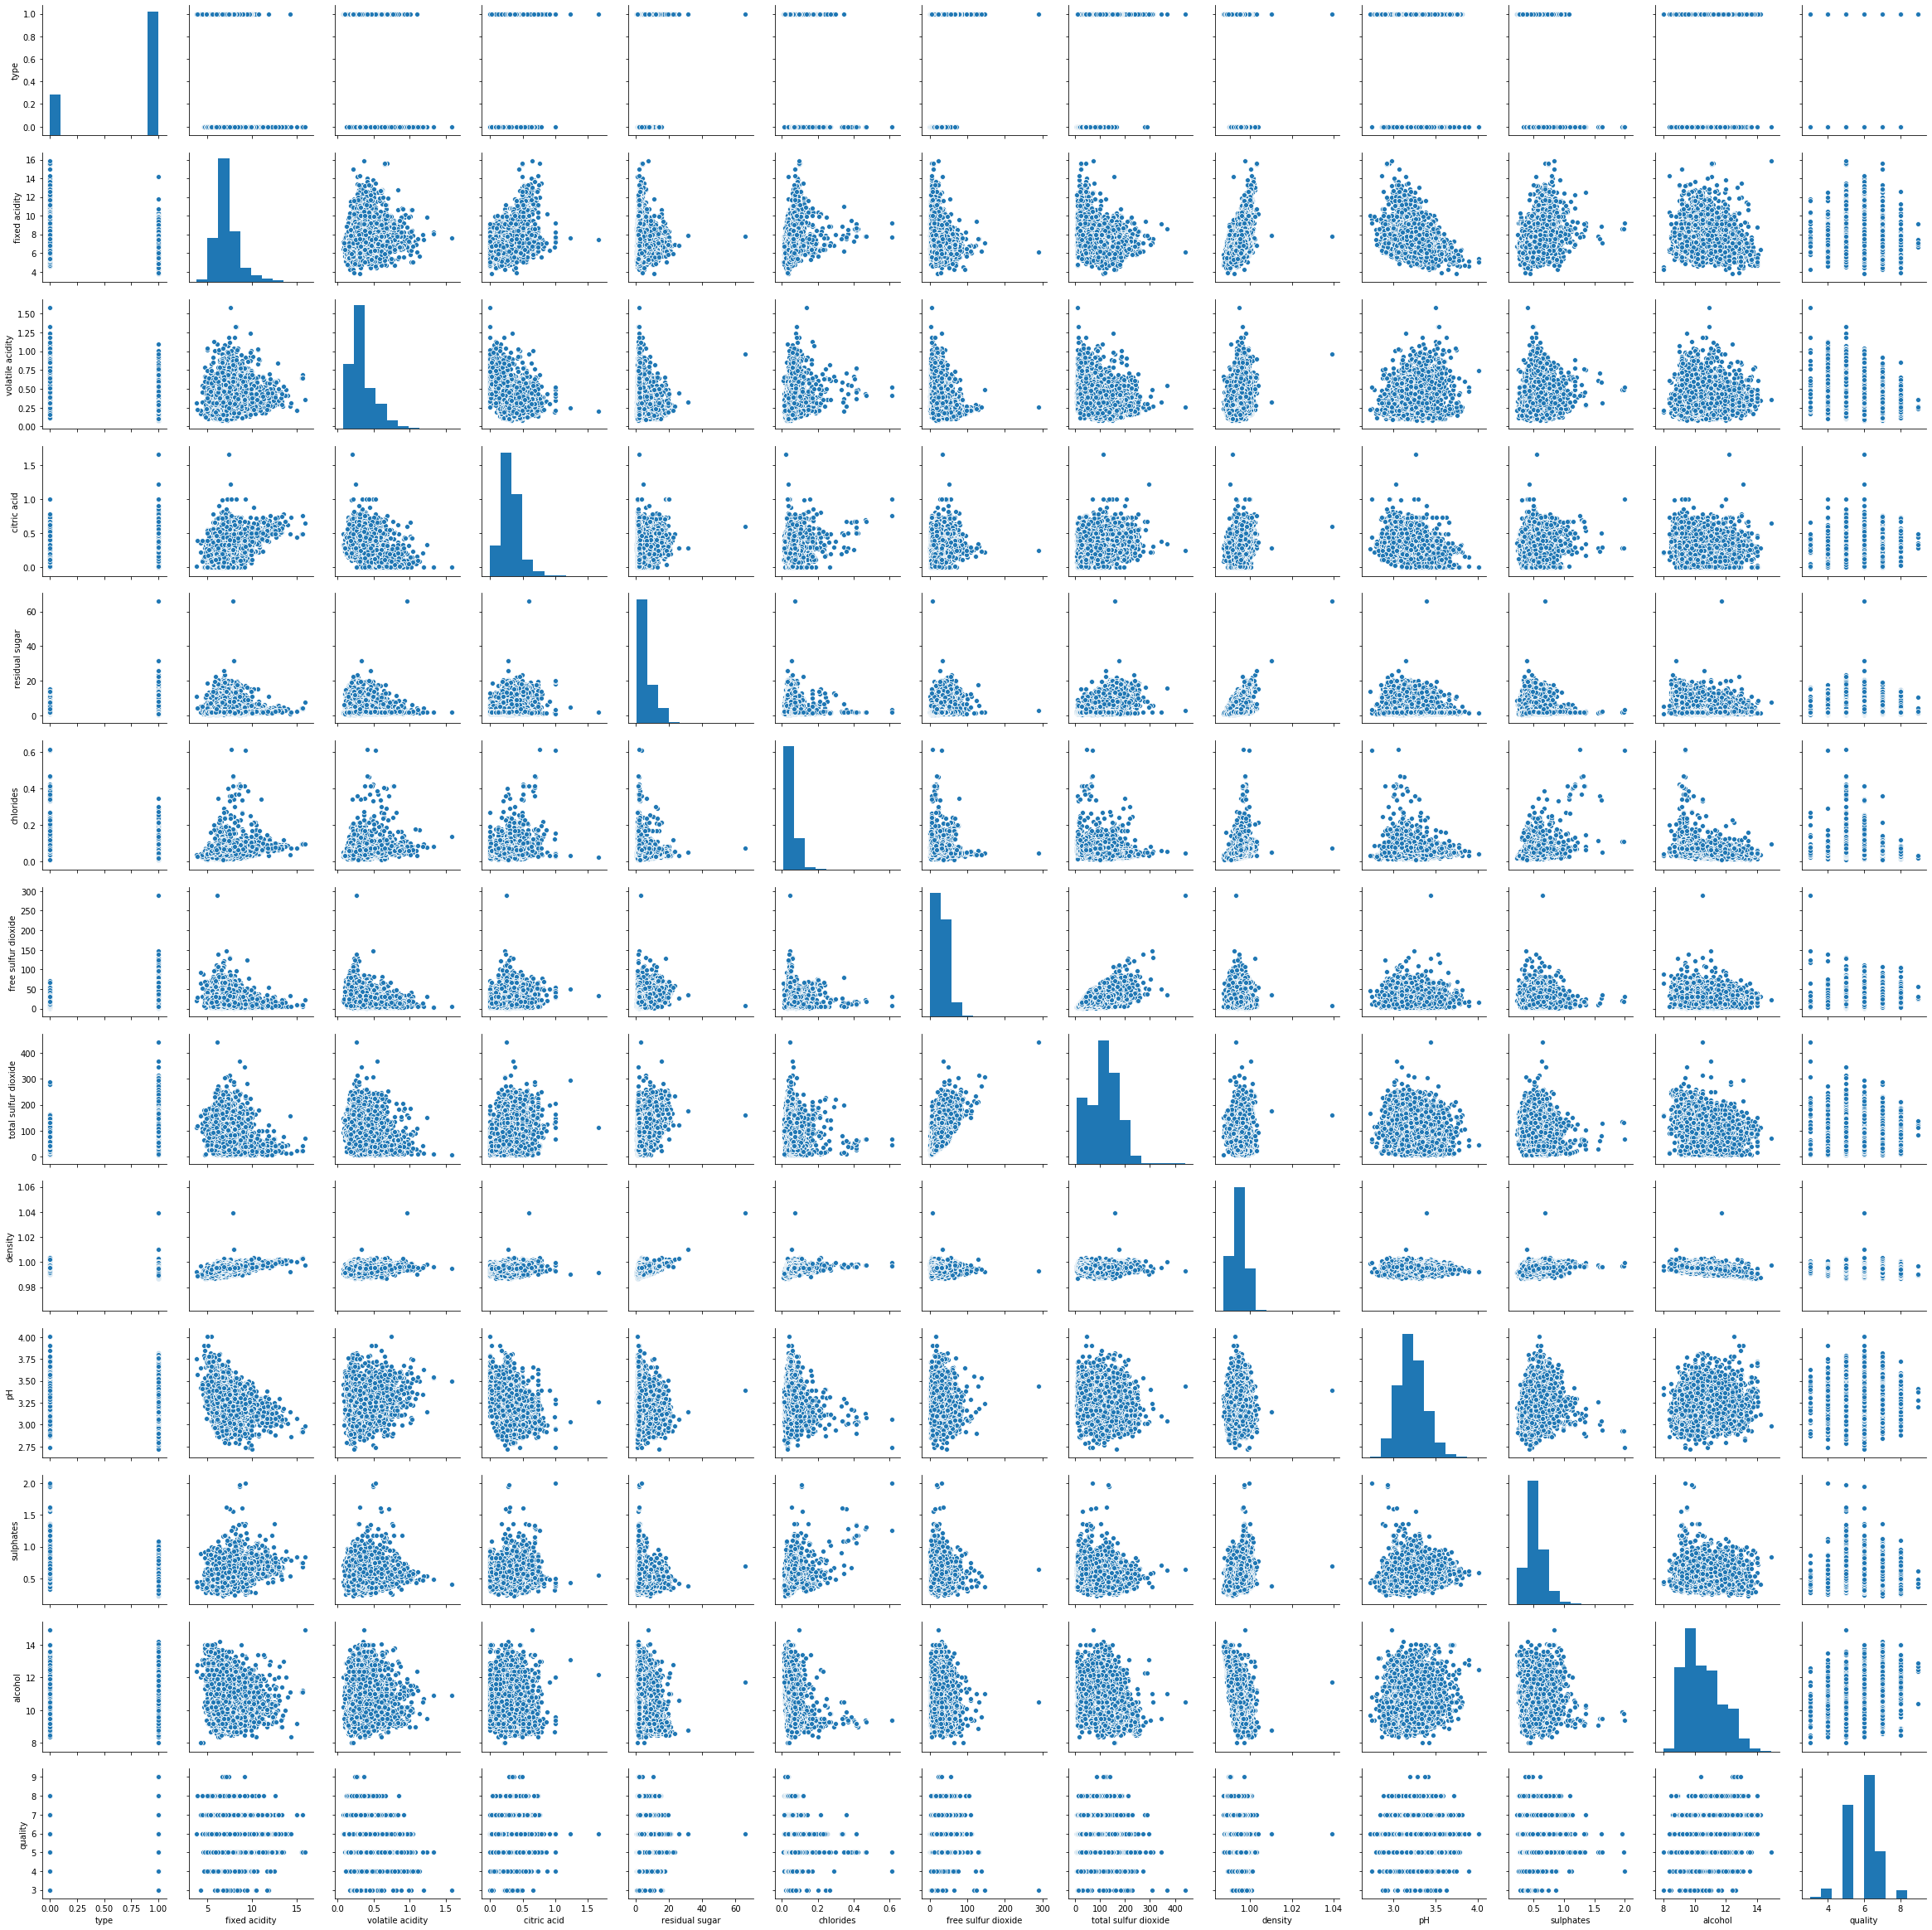

In [59]:
data1 = data.dropna
sns.pairplot(data)

C:\Users\Siddhartha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Siddhartha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


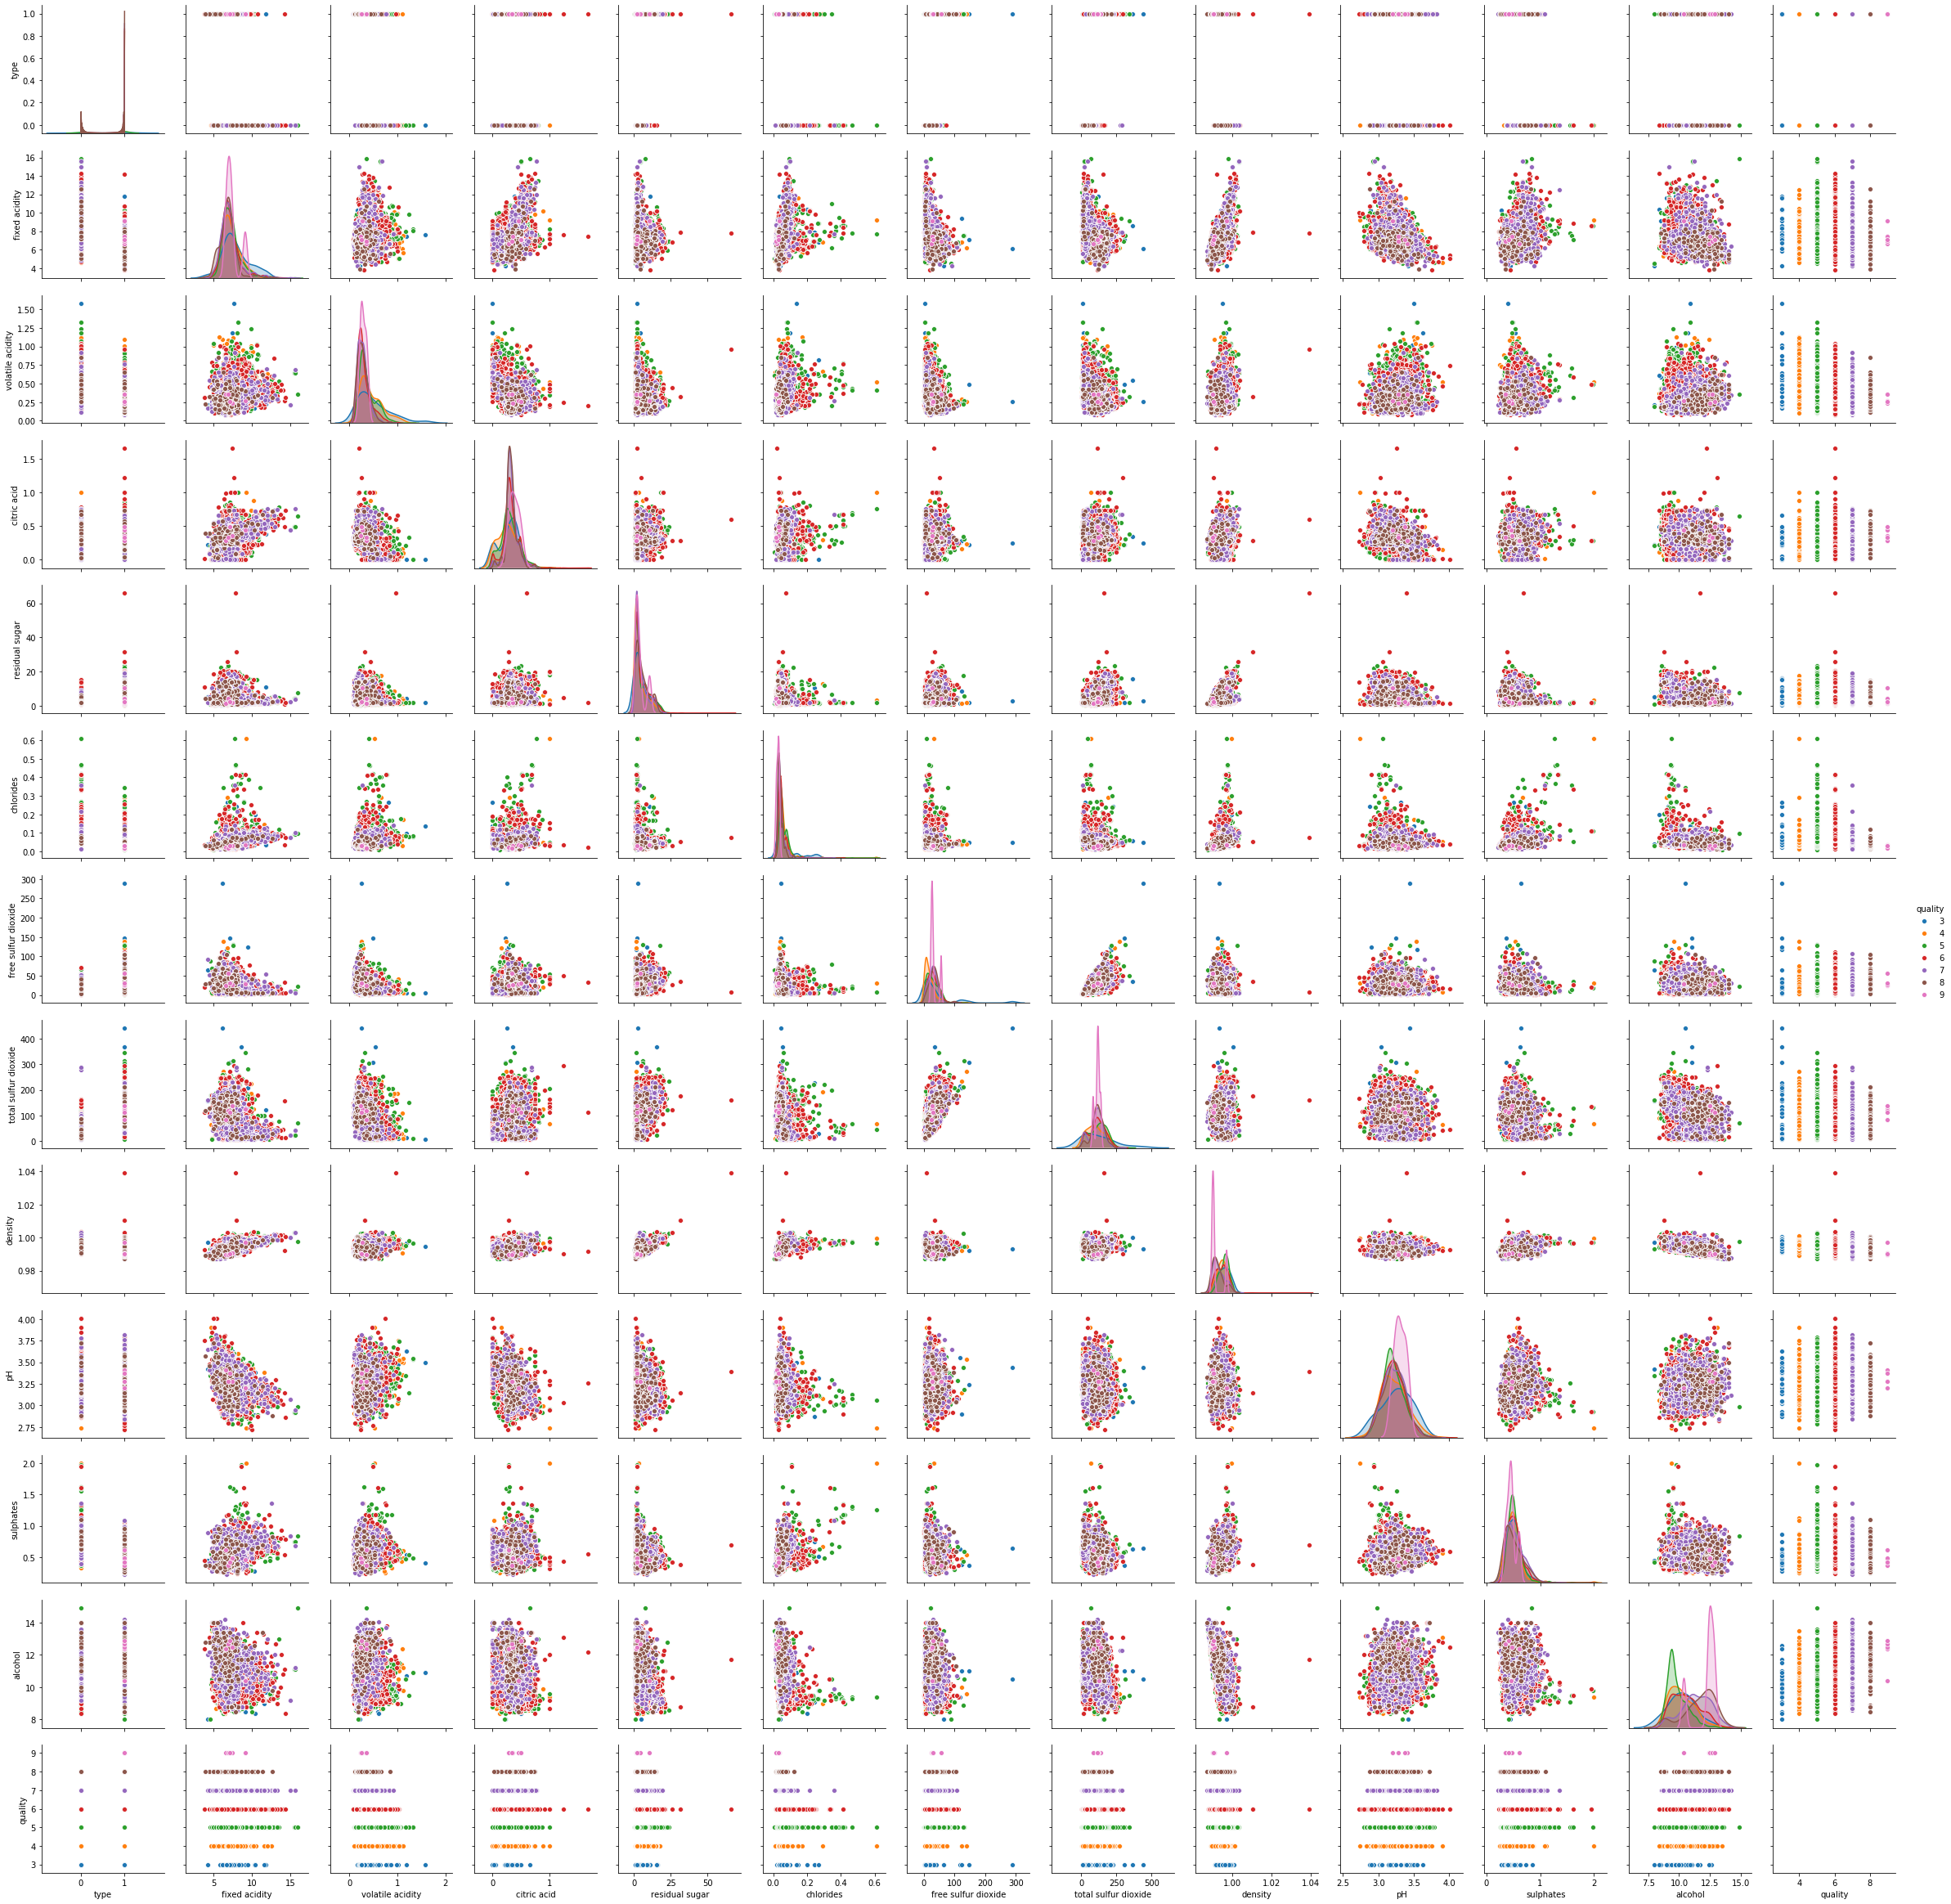

In [60]:
sns.pairplot(data,hue='quality')

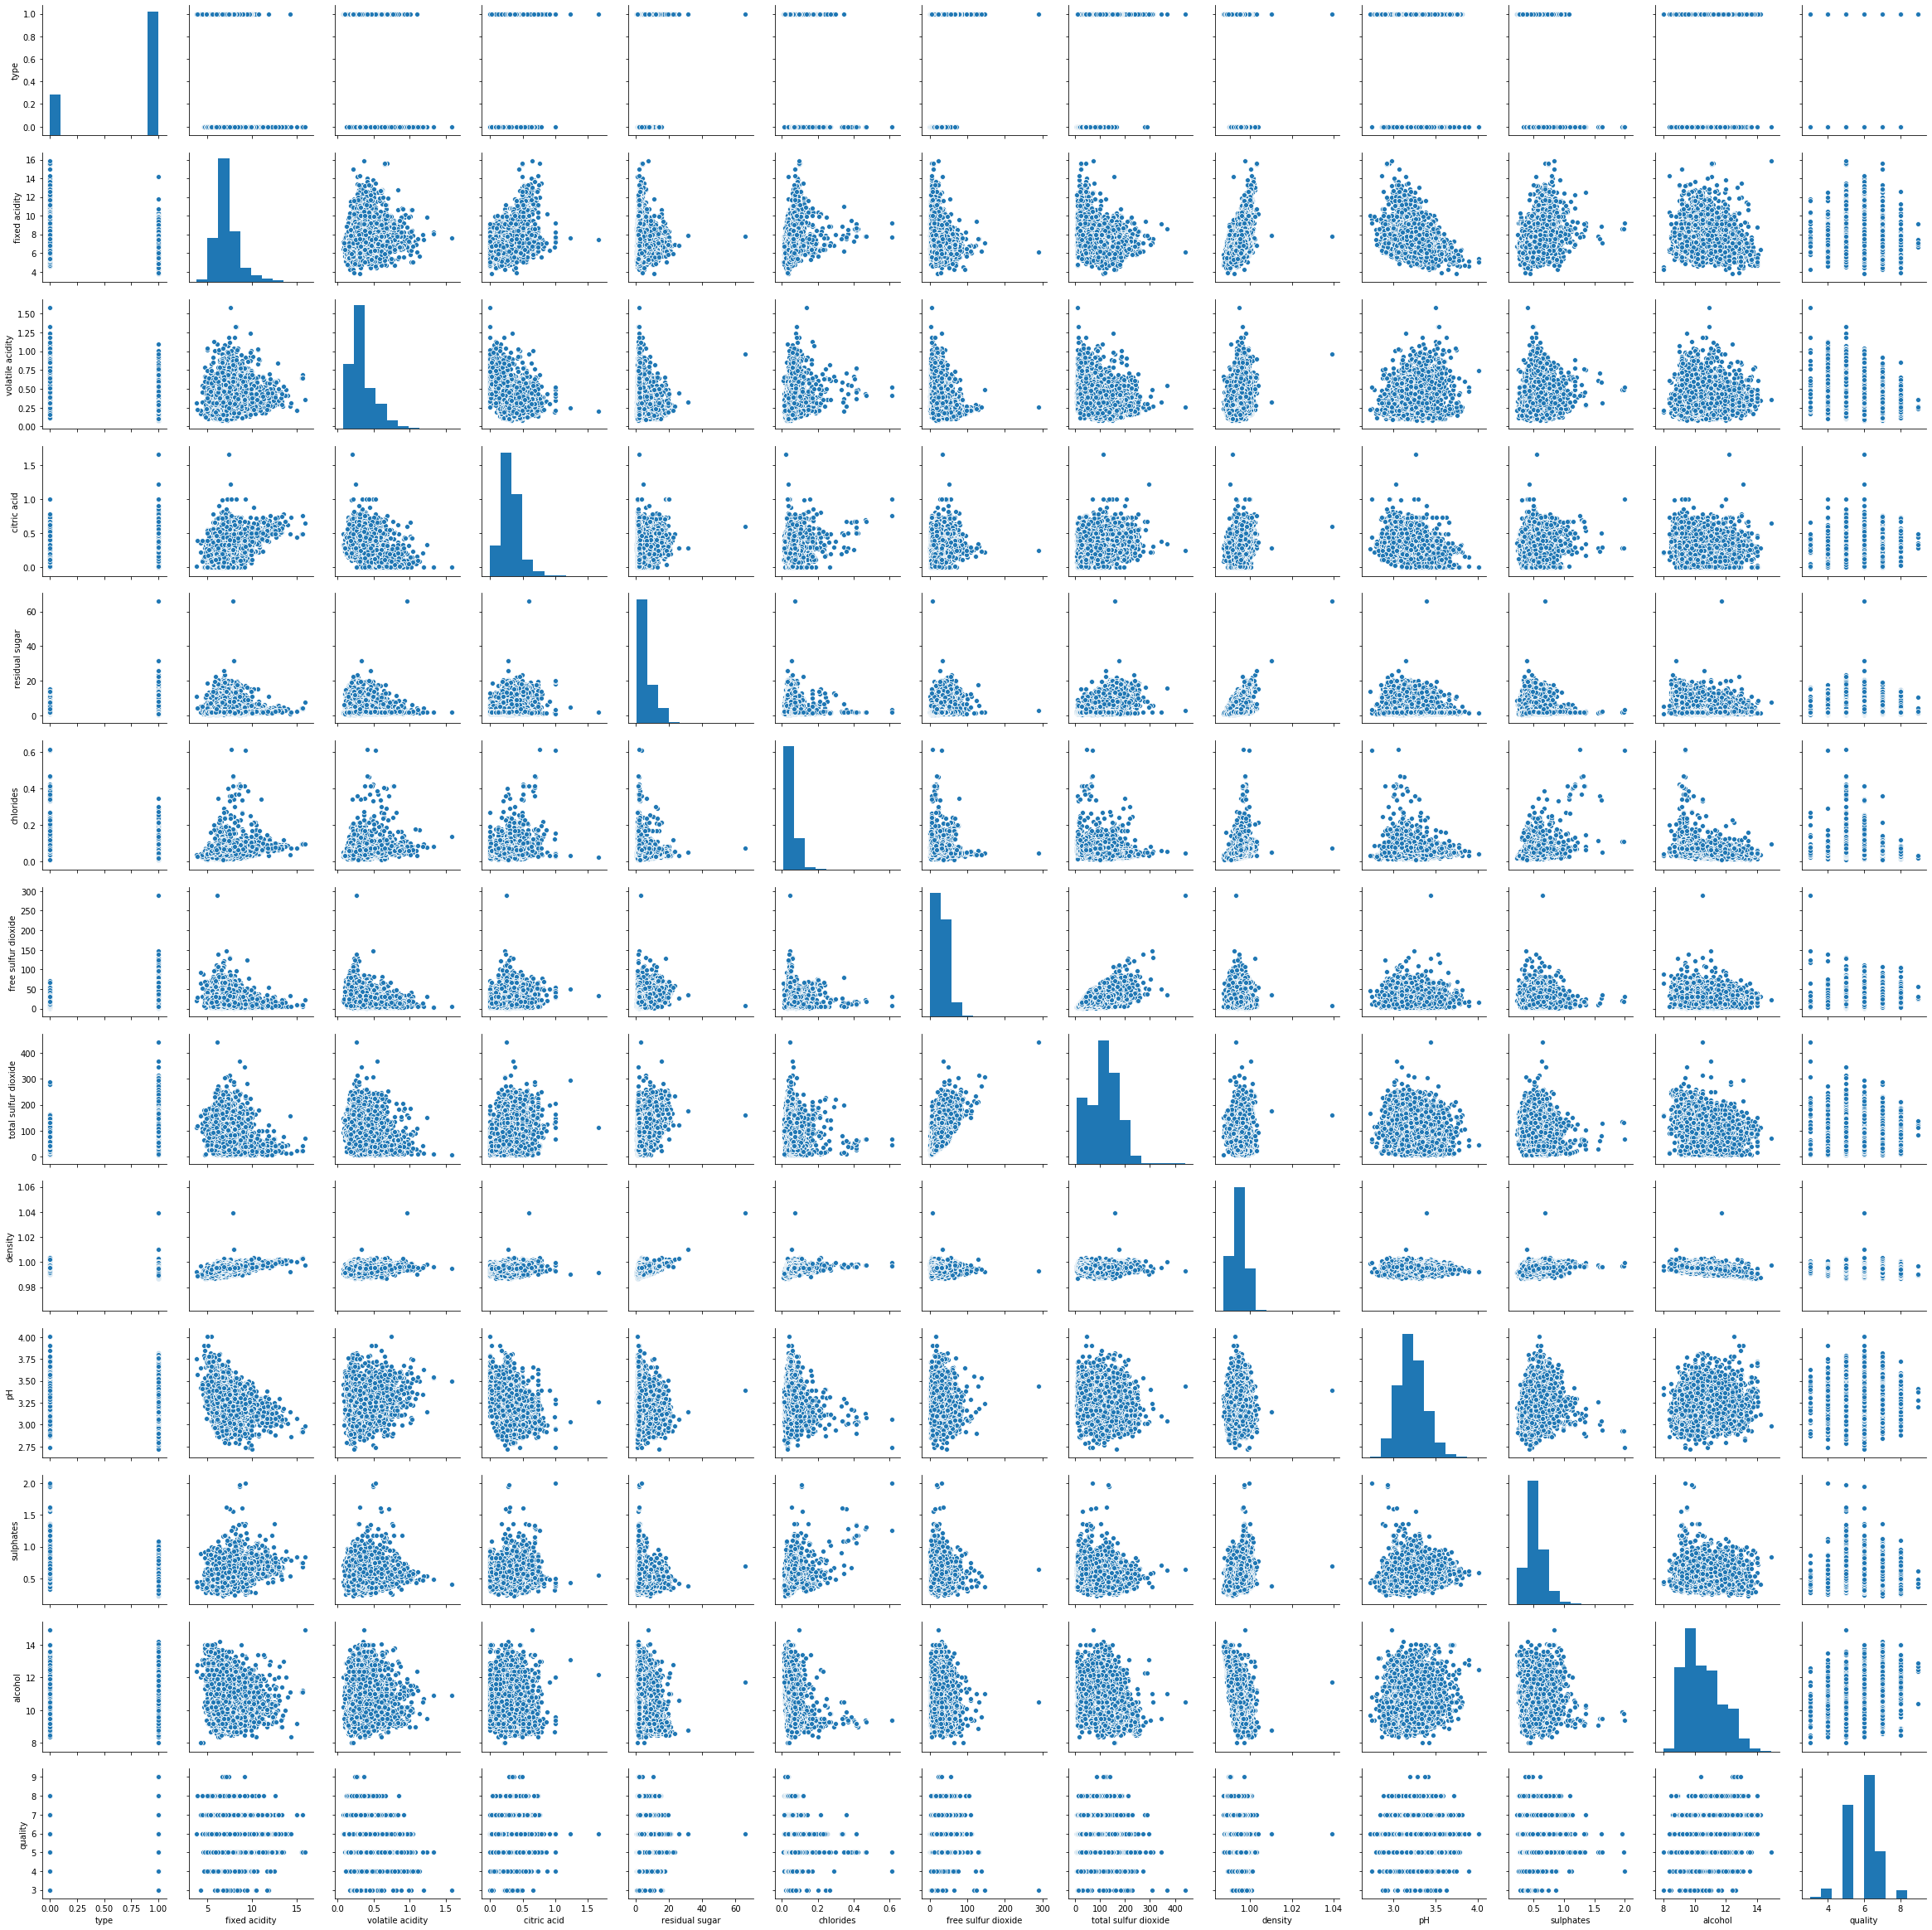

In [61]:
sns.pairplot(data, kind = 'scatter')

In [144]:
# Let's see NaN value rows and see if there is any pattern:
data[data.isna().any(axis=1)]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
33    white            6.2             0.120         0.34             NaN   
54    white            6.8             0.200         0.59             0.9   
86    white            7.2               NaN         0.63            11.0   
98    white            9.8             0.360         0.46            10.5   
139   white            8.1             0.280         0.39             1.9   
174   white            NaN             0.270         0.31            17.7   
224   white            6.3             0.495         0.22             1.8   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
268   white            5.3             0.585          NaN             7.1   
368   white            NaN             0.290         0.48             2.3   
438   white            7.4             0.155         0.34             NaN   
440   white            6.7             0.220         0.37             1.6   
518   white            NaN             0.130         0.28             1.9   
521   white            7.9               NaN         0.26             2.1   
587   white            6.1             0.320         0.25             1.7   
621   white            6.5               NaN         0.43             8.9   
697   white            7.5             0.310         0.51            14.8   
747   white            7.2             0.290         0.40             7.6   
812   white            6.4               NaN         0.28             1.1   
909   white            7.5             0.240          NaN            13.0   
972   white            6.8             0.220         0.35            17.5   
1079  white            NaN               NaN         0.29             6.2   
2894  white            6.4               NaN         0.36             1.4   
2902  white            NaN             0.360         0.14             8.9   
4892  white            6.5             0.230         0.38             1.3   
4895  white            6.5               NaN         0.19             1.2   
6320    red            7.0             0.540          NaN             2.1   
6321    red            6.4             0.530         0.09             3.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   
6486    red            7.2               NaN         0.33             2.5   
6493    red            5.9             0.550         0.10             2.2   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
33        0.045                 43.0                 117.0  0.99390  3.42   
54        0.147                 38.0                 132.0  0.99300   NaN   
86        0.044                 55.0                 156.0  0.99740  3.09   
98          NaN                  4.0                  83.0  0.99560  2.89   
139       0.029                 18.0                  79.0  0.99230   NaN   
174       0.051                 33.0                 173.0  0.99900  3.09   
224       0.046                 31.0                 140.0  0.99290  3.39   
249       0.037                 18.0                 119.0  0.99600  3.38   
267       0.043                 34.0                 149.0  0.99440  3.34   
268       0.044                 34.0                 145.0  0.99450  3.34   
368       0.049                 36.0                 178.0  0.99310  3.17   
438       0.045                 73.5                 214.0  0.99340  3.18   
440       0.028                 24.0                 102.0  0.99130   NaN   
518       0.050                 20.0                  78.0  0.99180  3.43   
521       0.039                  8.0                 143.0  0.99420  3.05   
58

In [145]:
# Since the NaN values have no pattern and are random, we can drop them.

data = data.dropna()

In [146]:
data

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

In [147]:
# Categorical Data to Numerical:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['type'] = le.fit_transform(data.type.values)

In [148]:
data

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6491     0            6.8             0.620         0.08             1.9   
6492     0            6.2             0.600         0.08             2.0   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

# Feature Selection method for filtering out useless variables:

In [149]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))

In [150]:
df_varsel = sel.fit_transform(data)

In [151]:
df_varsel

array([[  1. ,   7. ,  20.7, ..., 170. ,   8.8,   6. ],
       [  1. ,   6.3,   1.6, ..., 132. ,   9.5,   6. ],
       [  1. ,   8.1,   6.9, ...,  97. ,  10.1,   6. ],
       ...,
       [  0. ,   6.3,   2.3, ...,  40. ,  11. ,   6. ],
       [  0. ,   5.9,   2. , ...,  44. ,  10.2,   5. ],
       [  0. ,   6. ,   3.6, ...,  42. ,  11. ,   6. ]])

In [152]:
 dataset = pd.DataFrame(df_varsel)

In [153]:
dataset

0    1     2     3      4     5    6
0     1.0  7.0  20.7  45.0  170.0   8.8  6.0
1     1.0  6.3   1.6  14.0  132.0   9.5  6.0
2     1.0  8.1   6.9  30.0   97.0  10.1  6.0
3     1.0  7.2   8.5  47.0  186.0   9.9  6.0
4     1.0  7.2   8.5  47.0  186.0   9.9  6.0
...   ...  ...   ...   ...    ...   ...  ...
6458  0.0  6.8   1.9  28.0   38.0   9.5  6.0
6459  0.0  6.2   2.0  32.0   44.0  10.5  5.0
6460  0.0  6.3   2.3  29.0   40.0  11.0  6.0
6461  0.0  5.9   2.0  32.0   44.0  10.2  5.0
6462  0.0  6.0   3.6  18.0   42.0  11.0  6.0

[6463 rows x 7 columns]

In [154]:
# We have removed Useless variables. Now, we can execute a classification and then a regression model:

In [155]:
X = dataset.drop([6], axis = 1)

In [156]:
X

0    1     2     3      4     5
0     1.0  7.0  20.7  45.0  170.0   8.8
1     1.0  6.3   1.6  14.0  132.0   9.5
2     1.0  8.1   6.9  30.0   97.0  10.1
3     1.0  7.2   8.5  47.0  186.0   9.9
4     1.0  7.2   8.5  47.0  186.0   9.9
...   ...  ...   ...   ...    ...   ...
6458  0.0  6.8   1.9  28.0   38.0   9.5
6459  0.0  6.2   2.0  32.0   44.0  10.5
6460  0.0  6.3   2.3  29.0   40.0  11.0
6461  0.0  5.9   2.0  32.0   44.0  10.2
6462  0.0  6.0   3.6  18.0   42.0  11.0

[6463 rows x 6 columns]

In [157]:
y = dataset[6]

In [158]:
y

0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
6458    6.0
6459    5.0
6460    6.0
6461    5.0
6462    6.0
Name: 6, Length: 6463, dtype: float64

In [159]:
y = y.to_numpy()

In [160]:
X = X.to_numpy()

In [161]:
y

array([6., 6., 6., ..., 6., 5., 6.])

In [162]:
X

array([[  1. ,   7. ,  20.7,  45. , 170. ,   8.8],
       [  1. ,   6.3,   1.6,  14. , 132. ,   9.5],
       [  1. ,   8.1,   6.9,  30. ,  97. ,  10.1],
       ...,
       [  0. ,   6.3,   2.3,  29. ,  40. ,  11. ],
       [  0. ,   5.9,   2. ,  32. ,  44. ,  10.2],
       [  0. ,   6. ,   3.6,  18. ,  42. ,  11. ]])

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
minmaxscale = MinMaxScaler().fit(X)

In [165]:
X = minmaxscale.transform(X)
X

array([[1.        , 0.26446281, 0.30828221, 0.15277778, 0.37788018,
        0.11594203],
       [1.        , 0.20661157, 0.01533742, 0.04513889, 0.29032258,
        0.2173913 ],
       [1.        , 0.3553719 , 0.09662577, 0.10069444, 0.20967742,
        0.30434783],
       ...,
       [0.        , 0.20661157, 0.02607362, 0.09722222, 0.07834101,
        0.43478261],
       [0.        , 0.17355372, 0.02147239, 0.10763889, 0.0875576 ,
        0.31884058],
       [0.        , 0.18181818, 0.04601227, 0.05902778, 0.08294931,
        0.43478261]])

In [166]:
# Train Test Split:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=42)

In [168]:
from sklearn import svm

In [169]:
C = 2.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

In [170]:
y_pred = svc.predict(X_test)

In [171]:
y_pred

array([6., 5., 6., ..., 6., 6., 6.])

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5117574257425742

In [173]:
svc = svm.SVC(kernel='sigmoid', C=C).fit(X_train, y_train)

C:\Users\Siddhartha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [174]:
y_pred = svc.predict(X_test)

In [175]:
accuracy_score(y_test, y_pred)

0.5123762376237624

# Linear Regression:

In [176]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
predictions = lin.predict(X_test)

In [178]:
predictions

array([5.73732595, 5.55539054, 6.37052462, ..., 5.72220332, 6.03601544,
       6.40462907])

In [179]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [180]:
# The coefficients
print('Coefficients: \n', lin.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Coefficients: 
 [ 0.19493623  0.19278952  1.31316702  2.34292275 -0.94984311  2.30781668]
Mean squared error: 0.56
Coefficient of determination: 0.28


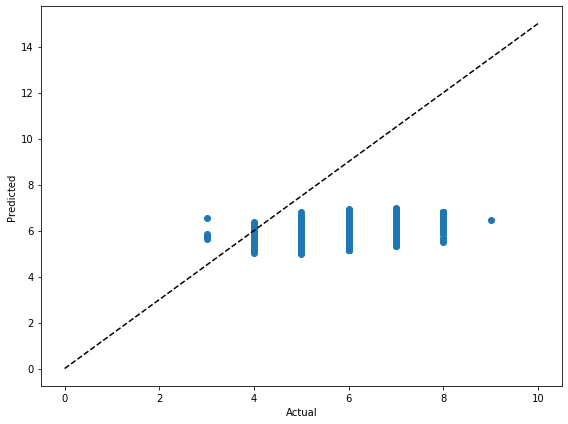

In [181]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y)
predicted = clf.predict(X_test)
expected = y
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 10], [0, 15], '--k')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()

# Ridge Regression

In [182]:

from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.5)
clf.fit(X, y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [183]:
predictions_Ridge = clf.predict(X_test)

In [184]:
predictions_Ridge


array([5.73608511, 5.51993311, 6.36821446, ..., 5.71877312, 6.04900102,
       6.40383575])

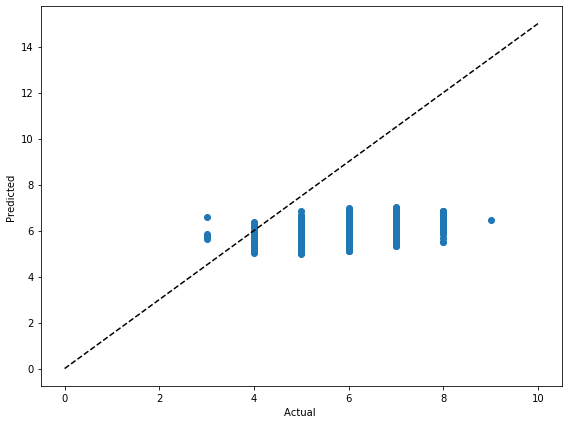

In [185]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_Ridge)
plt.plot([0, 10], [0, 15], '--k')
plt.axis('tight')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.tight_layout()

# We cannot come up with a good model with the above mentioned algorithms and preprocessing. We would try more methods with the same dataset in the next upload. 

In [198]:
from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=1)

In [199]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [200]:
y_pred = neigh.predict(X_test)

In [201]:
accuracy_score(y_test, y_pred)

0.6002475247524752

In [ ]:
# So far we have 60% accuracy at best. 